In [61]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
!wget -O - 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip' > 'data.zip'

--2017-10-04 23:36:13--  https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip
Resolving s3.amazonaws.com... 54.231.49.43
Connecting to s3.amazonaws.com|54.231.49.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23145783 (22M) [application/zip]
Saving to: “STDOUT”

100%[======================================>] 23,145,783  35.2M/s   in 0.6s    

2017-10-04 23:36:14 (35.2 MB/s) - written to stdout [23145783/23145783]



In [63]:
import zipfile

zip_ref = zipfile.ZipFile('data.zip', 'r')
zip_ref.extractall()

In [67]:
real_df = pd.read_csv('201512-citibike-tripdata.csv')

df = real_df


In [68]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


# Idea: Customers are more likely than Subscribers to have longer bike trips.
<p>
<p>
# Null Hypothesis: 
## The average trip duration of subscribers is the same or greater than the average trip duration of customers.


${S_{\mathrm{duration}}} >= {T_{\mathrm{duration}}} $
<p>

# Alternative Hypothesis:
## The average trip duration of subscribers is less than the average trip duration of customers.

${S_{\mathrm{duration}}} < {T_{\mathrm{duration}}} $
<p>

<p>


# Significance level alpha = 0.05

<p>

# The data month is December 2015.



In [69]:
df.columns

# Now we need to separate out 'usertype' and 'date', continued...

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [71]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [72]:
df.head()

,tripduration,usertype
0,475,Subscriber
1,684,Subscriber
2,1063,Subscriber
3,1075,Subscriber
4,293,Subscriber


In [73]:
# Now to separate subscribers from customers

#groups = df.groupby(['usertype', 'starttime'].mean())

In [74]:
print(df.shape)

subscribers = df[df['usertype'] == 'Subscriber']
print(np.mean(subscribers['tripduration']))
everyoneelse = df[df['usertype'] != 'Subscriber']
print(everyoneelse.shape)
print(np.mean(everyoneelse['tripduration']))

subscriber_avg = np.mean(subscribers['tripduration'])
customer_avg = np.mean(everyoneelse['tripduration'])

(804125, 2)
797.317738045
(67877, 2)
2555.30983986


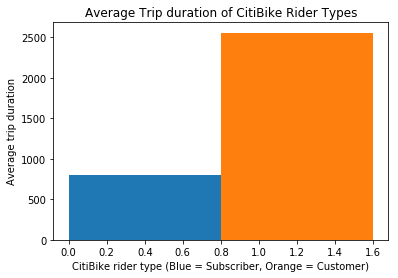

In [75]:
#plot the averages

plt.bar(0, align='edge', height=subscriber_avg)
plt.bar(0.8,align='edge', height=customer_avg)
plt.ylabel('Average trip duration')
plt.xlabel('CitiBike rider type (Blue = Subscriber, Orange = Customer)')
plt.title('Average Trip duration of CitiBike Rider Types')
plt.show()

## Figure 1: A bar plot showing the average trip durations of CitiBike subscribers (left) versus CitiBike customers (right). Customers show a significantly longer average trip duration.